In [3]:
import numpy as np
import pandas as pd
import scanpy.api as sc
import timeit
import Cluster_Ensembles as CE
from functools import reduce
start_time=timeit.default_timer()
import anndata as ad
print(ad.__version__)
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80)  # low dpi (dots per inch) yields small inline figures
sc.logging.print_versions()

0.6.1
scanpy==1.0.4 anndata==0.6.1 numpy==1.14.3 scipy==1.1.0 pandas==0.23.0 scikit-learn==0.19.1 statsmodels==0.9.0 python-igraph==0.7.1 louvain==0.6.1 


In [8]:
path = '/home/ehamilton/ProjectSummer2018/GRCh38/LiverCancer/BGI_LiverCancer/'
P02 =ad.read_csv(path + 'HCC_P02_count_mat.csv', delimiter= '\t', first_column_names=True)

In [5]:
P02 = P02.T

In [6]:
Genes = P02.var.index.tolist()
import mygene
mg = mygene.MyGeneInfo()
Names = mg.querymany(Genes, scopes = 'ensembl.gene')
df = pd.DataFrame(Names)
df

querying 1-1000...done.
querying 1001-2000...done.
querying 2001-3000...done.
querying 3001-4000...done.
querying 4001-5000...done.
querying 5001-6000...done.
querying 6001-7000...done.
querying 7001-8000...done.
querying 8001-9000...done.
querying 9001-10000...done.
querying 10001-11000...done.
querying 11001-12000...done.
querying 12001-13000...done.
querying 13001-14000...done.
querying 14001-15000...done.
querying 15001-16000...done.
querying 16001-17000...done.
querying 17001-18000...done.
querying 18001-19000...done.
querying 19001-20000...done.
querying 20001-21000...done.
querying 21001-22000...done.
querying 22001-23000...done.
querying 23001-24000...done.
querying 24001-25000...done.
querying 25001-26000...done.
querying 26001-27000...done.
querying 27001-28000...done.
querying 28001-29000...done.
querying 29001-30000...done.
querying 30001-31000...done.
querying 31001-32000...done.
querying 32001-33000...done.
querying 33001-34000...done.
querying 34001-35000...done.
queryin

,_id,_score,entrezgene,name,notfound,query,symbol,taxid
0,7105,18.175232,7105.0,tetraspanin 6,NaN,ENSG00000000003,TSPAN6,9606.0
1,64102,17.990433,64102.0,tenomodulin,NaN,ENSG00000000005,TNMD,9606.0
2,8813,17.207731,8813.0,dolichyl-phosphate mannosyltransferase subunit...,NaN,ENSG00000000419,DPM1,9606.0
3,57147,17.903358,57147.0,SCY1 like pseudokinase 3,NaN,ENSG00000000457,SCYL3,9606.0
4,55732,18.434100,55732.0,chromosome 1 open reading frame 112,NaN,ENSG00000000460,C1orf112,9606.0
5,2268,17.512253,2268.0,"FGR proto-oncogene, Src family tyrosine kinase",NaN,ENSG00000000938,FGR,9606.0
6,3075,17.862701,3075.0,complement factor H,NaN,ENSG00000000971,CFH,9606.0
7,2519,17.719020,2519.0,alpha-L-fucosidase 2,NaN,ENSG00000001036,FUCA2,9606.0
8,2729,18.136440,2729.0,glutamate-cysteine ligase catalytic subunit,NaN,ENSG00000001084,GCLC,9606.0
9,4800,17.453537,4800.0,nuclear transcription factor Y subunit alpha,NaN,ENSG00000001167,NFYA,9606.0


In [5]:
df1 = df
df1 = df1.drop_duplicates(subset=['query'])
print(df1.head(5))
print(df1.shape)
df1.head(5)

     _id     _score  entrezgene  \
0   7105  18.175232      7105.0   
1  64102  17.990433     64102.0   
2   8813  17.891365      8813.0   
3  57147  18.399511     57147.0   
4  55732  18.144922     55732.0   

                                                name notfound  \
0                                      tetraspanin 6      NaN   
1                                        tenomodulin      NaN   
2  dolichyl-phosphate mannosyltransferase subunit...      NaN   
3                           SCY1 like pseudokinase 3      NaN   
4                chromosome 1 open reading frame 112      NaN   

             query    symbol   taxid  
0  ENSG00000000003    TSPAN6  9606.0  
1  ENSG00000000005      TNMD  9606.0  
2  ENSG00000000419      DPM1  9606.0  
3  ENSG00000000457     SCYL3  9606.0  
4  ENSG00000000460  C1orf112  9606.0  
(49918, 8)


,_id,_score,entrezgene,name,notfound,query,symbol,taxid
0,7105,18.175232,7105.0,tetraspanin 6,NaN,ENSG00000000003,TSPAN6,9606.0
1,64102,17.990433,64102.0,tenomodulin,NaN,ENSG00000000005,TNMD,9606.0
2,8813,17.891365,8813.0,dolichyl-phosphate mannosyltransferase subunit...,NaN,ENSG00000000419,DPM1,9606.0
3,57147,18.399511,57147.0,SCY1 like pseudokinase 3,NaN,ENSG00000000457,SCYL3,9606.0
4,55732,18.144922,55732.0,chromosome 1 open reading frame 112,NaN,ENSG00000000460,C1orf112,9606.0


In [6]:
gene_has_genesymbol = df1['notfound'].isnull()
P02 = P02[:, gene_has_genesymbol]

In [7]:
dfGeneNameMap = df1
print(dfGeneNameMap.shape)
dfGeneNameMap = df1.drop(df1.columns[[0,1,2,3,7]], axis=1)
toString = lambda x: str(x)
dfGeneNameMap = dfGeneNameMap.loc[dfGeneNameMap['notfound'].apply(toString)=='nan',:]
print(dfGeneNameMap.columns)
print(dfGeneNameMap.shape)
dfGeneNameMap.head(5)

(49918, 8)
Index(['notfound', 'query', 'symbol'], dtype='object')
(49523, 3)


,notfound,query,symbol
0,NaN,ENSG00000000003,TSPAN6
1,NaN,ENSG00000000005,TNMD
2,NaN,ENSG00000000419,DPM1
3,NaN,ENSG00000000457,SCYL3
4,NaN,ENSG00000000460,C1orf112


In [8]:
print(P02.var.index)
genesymbol_in_order = dfGeneNameMap.set_index(P02.var.index)['symbol']
print(genesymbol_in_order.head(5))
P02.var.index = genesymbol_in_order
P02.var_names = genesymbol_in_order
P02.obs_names = P02.obs.index.tolist()
print(P02.var.index)
print(P02.shape)

Index(['ENSG00000000003', 'ENSG00000000005', 'ENSG00000000419',
       'ENSG00000000457', 'ENSG00000000460', 'ENSG00000000938',
       'ENSG00000000971', 'ENSG00000001036', 'ENSG00000001084',
       'ENSG00000001167',
       ...
       'ENSG00000283674', 'ENSG00000283679', 'ENSG00000283680',
       'ENSG00000283683', 'ENSG00000283684', 'ENSG00000283689',
       'ENSG00000283692', 'ENSG00000283696', 'ENSG00000283697',
       'ENSG00000283698'],
      dtype='object', length=49523)
ENSG00000000003      TSPAN6
ENSG00000000005        TNMD
ENSG00000000419        DPM1
ENSG00000000457       SCYL3
ENSG00000000460    C1orf112
Name: symbol, dtype: object
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Index(['TSPAN6', 'TNMD', 'DPM1', 'SCYL3', 'C1orf112', 'FGR', 'CFH', 'FUCA2',
       'GCLC', 'NFYA',
       ...
       'AC068587.4', 'AC025278.3', 'AC134980.1', 'MYOCOS', 'AC013268.5',
       'AC018553.2', 'Z96074.1', 'AL592295.4', 'HSFX3', 'AC012442.3'],
      dtyp

In [9]:
P02.var

""
symbol
TSPAN6
TNMD
DPM1
SCYL3
C1orf112
FGR
CFH
FUCA2
GCLC


In [10]:
sc.pp.filter_cells(P02, min_genes=200)
sc.pp.filter_genes(P02, min_cells=3)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [11]:
P02.var_names_make_unique

<bound method AnnData.var_names_make_unique of AnnData object with n_obs × n_vars = 912 × 33898 
    obs: 'n_genes'
    var: 'n_cells'>

In [12]:
mito_genes = [name for name in P02.var_names if name.startswith('MT-')]
P02.obs['percent_mito']=np.sum( P02[:, mito_genes].X, axis=1)/ np.sum(P02.X, axis=1)
P02.obs['n_counts']= P02.X.sum(axis=1)

/home/ehamilton/miniconda3/envs/singlecellanalysis/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/ehamilton/miniconda3/envs/singlecellanalysis/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


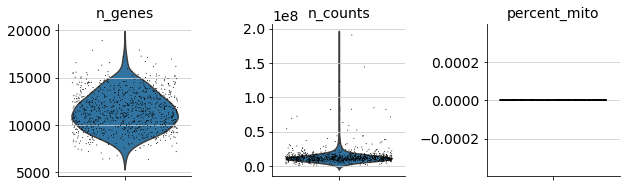

In [13]:
sc.pl.violin(P02, ['n_genes','n_counts','percent_mito'], jitter=0.4, multi_panel=True)

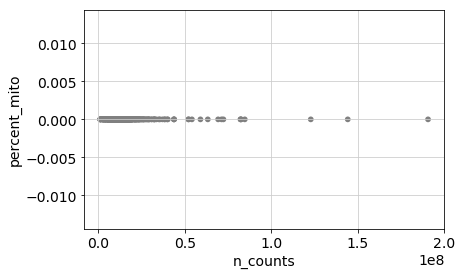

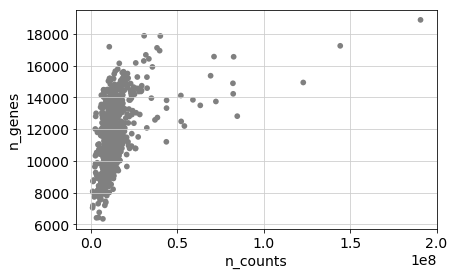

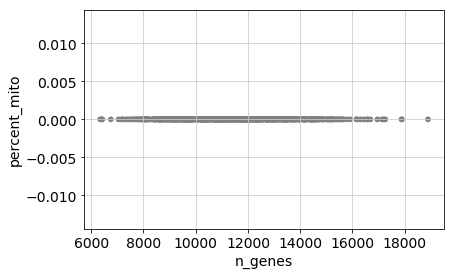

In [14]:
sc.pl.scatter(P02, x='n_counts',y='percent_mito')
sc.pl.scatter(P02, x='n_counts',y='n_genes')
sc.pl.scatter(P02, x='n_genes',y='percent_mito')

In [15]:
P02 = P02[P02.obs['n_genes'] < 16000, :]
print(P02.shape)

(898, 33898)


In [16]:
P02.raw = sc.pp.log1p(P02, copy=True)
P02.var_names_make_unique

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


<bound method AnnData.var_names_make_unique of AnnData object with n_obs × n_vars = 898 × 33898 
    obs: 'n_genes', 'percent_mito', 'n_counts'
    var: 'n_cells'>

In [17]:
sc.pp.normalize_per_cell(P02, counts_per_cell_after=20000)
filter_result = sc.pp.filter_genes_dispersion(P02.X, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.filter_genes_dispersion(filter_result)

ValueError: Buffer dtype mismatch, expected 'Python object' but got 'signed char'

In [18]:
P02.raw = sc.pp.log1p(P02, copy=True)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [19]:
sc.tl.pca(P02)

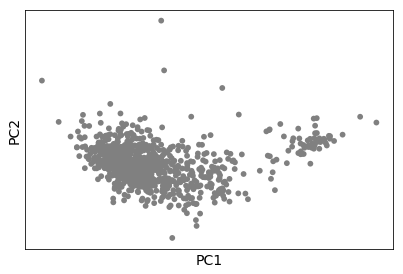

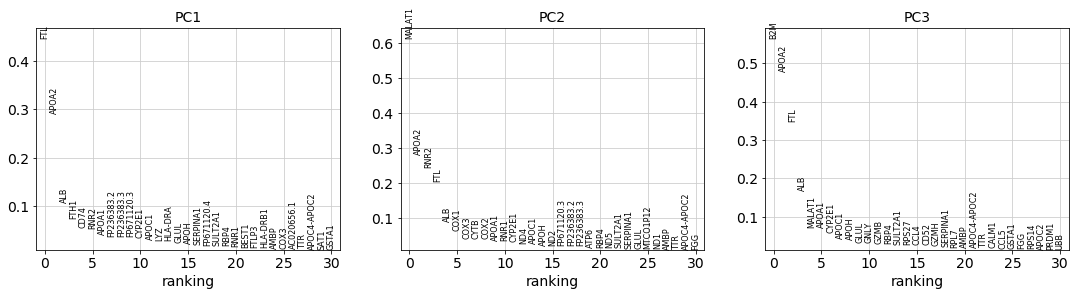

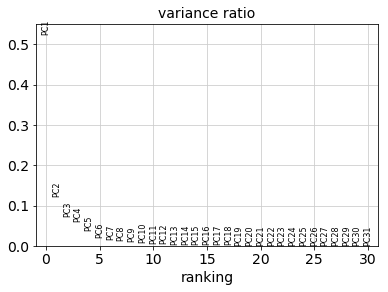

In [20]:
sc.pl.pca(P02)

In [21]:
sc.tl.tsne(P02, random_state=2, n_pcs=10)

computing tSNE
    using 'X_pca' with n_pcs = 10
    using the 'MulticoreTSNE' package by Ulyanov (2017)
    finished (0:00:02.68) --> added
    'X_tsne', tSNE coordinates (adata.obsm)


In [22]:
import MulticoreTSNE

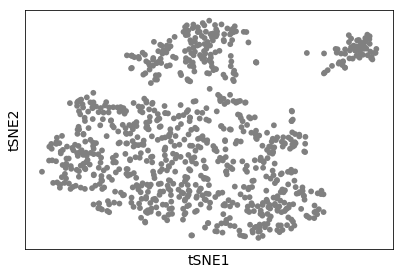

In [23]:
sc.pl.tsne(P02)

In [24]:
sc.pp.neighbors(P02, n_neighbors=10)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:03.99) --> added to `.uns['neighbors']`
    'distances', weighted adjacency matrix
    'connectivities', weighted adjacency matrix


In [25]:
P02.obs

,n_genes,percent_mito,n_counts
P02_A_0925,11755,0.0,8301043.0
P02_A_0926,11611,0.0,5695071.0
P02_A_0927,10659,0.0,5994274.0
P02_A_0928,10993,0.0,8595596.0
P02_A_0929,11897,0.0,5938872.0
P02_A_0930,11738,0.0,5630615.0
P02_A_0931,12031,0.0,7913389.0
P02_A_0932,11853,0.0,7876506.0
P02_A_0935,10472,0.0,4050691.0
P02_A_0936,13753,0.0,12984275.0


In [26]:
sc.tl.louvain(P02)

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:00.07) --> found 8 clusters and added
    'louvain', the cluster labels (adata.obs, categorical)


In [27]:
sc.tl.umap(P02)

computing UMAP
    finished (0:00:03.08) --> added
    'X_umap', UMAP coordinates (adata.obsm)


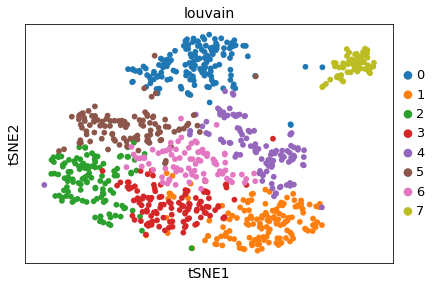

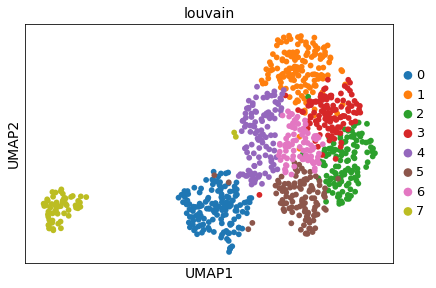

In [28]:
sc.pl.tsne(P02, color='louvain')
sc.pl.umap(P02, color='louvain')

In [42]:
sc.tl.louvain(P02, resolution=1.69)

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:00.07) --> found 13 clusters and added
    'louvain', the cluster labels (adata.obs, categorical)


    number of defined colors smaller than number of categories, using palette


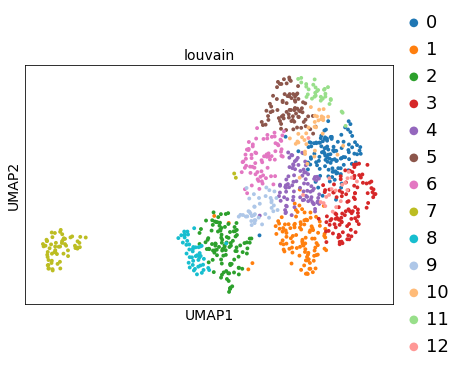

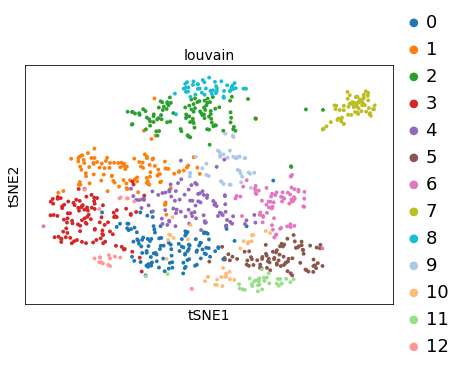

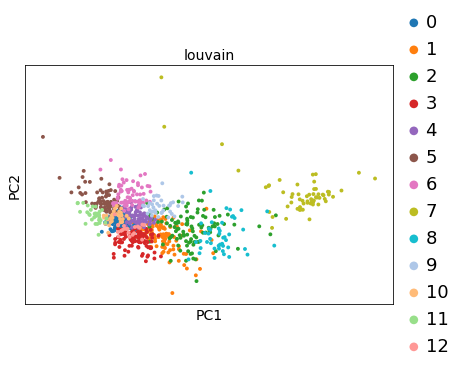

In [43]:
sc.pl.umap(P02, color='louvain',size = 60, legend_fontsize = 18)
sc.pl.tsne(P02, color='louvain',    size = 60, legend_fontsize = 18)
sc.pl.pca_scatter(P02, color='louvain', size = 60, legend_fontsize = 18)

In [44]:
P02.obs

,n_genes,percent_mito,n_counts,louvain
P02_A_0925,11755,0.0,8301043.0,6
P02_A_0926,11611,0.0,5695071.0,9
P02_A_0927,10659,0.0,5994274.0,5
P02_A_0928,10993,0.0,8595596.0,1
P02_A_0929,11897,0.0,5938872.0,6
P02_A_0930,11738,0.0,5630615.0,9
P02_A_0931,12031,0.0,7913389.0,6
P02_A_0932,11853,0.0,7876506.0,6
P02_A_0935,10472,0.0,4050691.0,6
P02_A_0936,13753,0.0,12984275.0,6


In [45]:
P02.var

,n_cells
symbol,
TSPAN6,638
DPM1,729
SCYL3,645
C1orf112,364
FGR,564
CFH,371
FUCA2,570
GCLC,854
NFYA,378


ranking genes
    finished (0:00:01.98) --> added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids


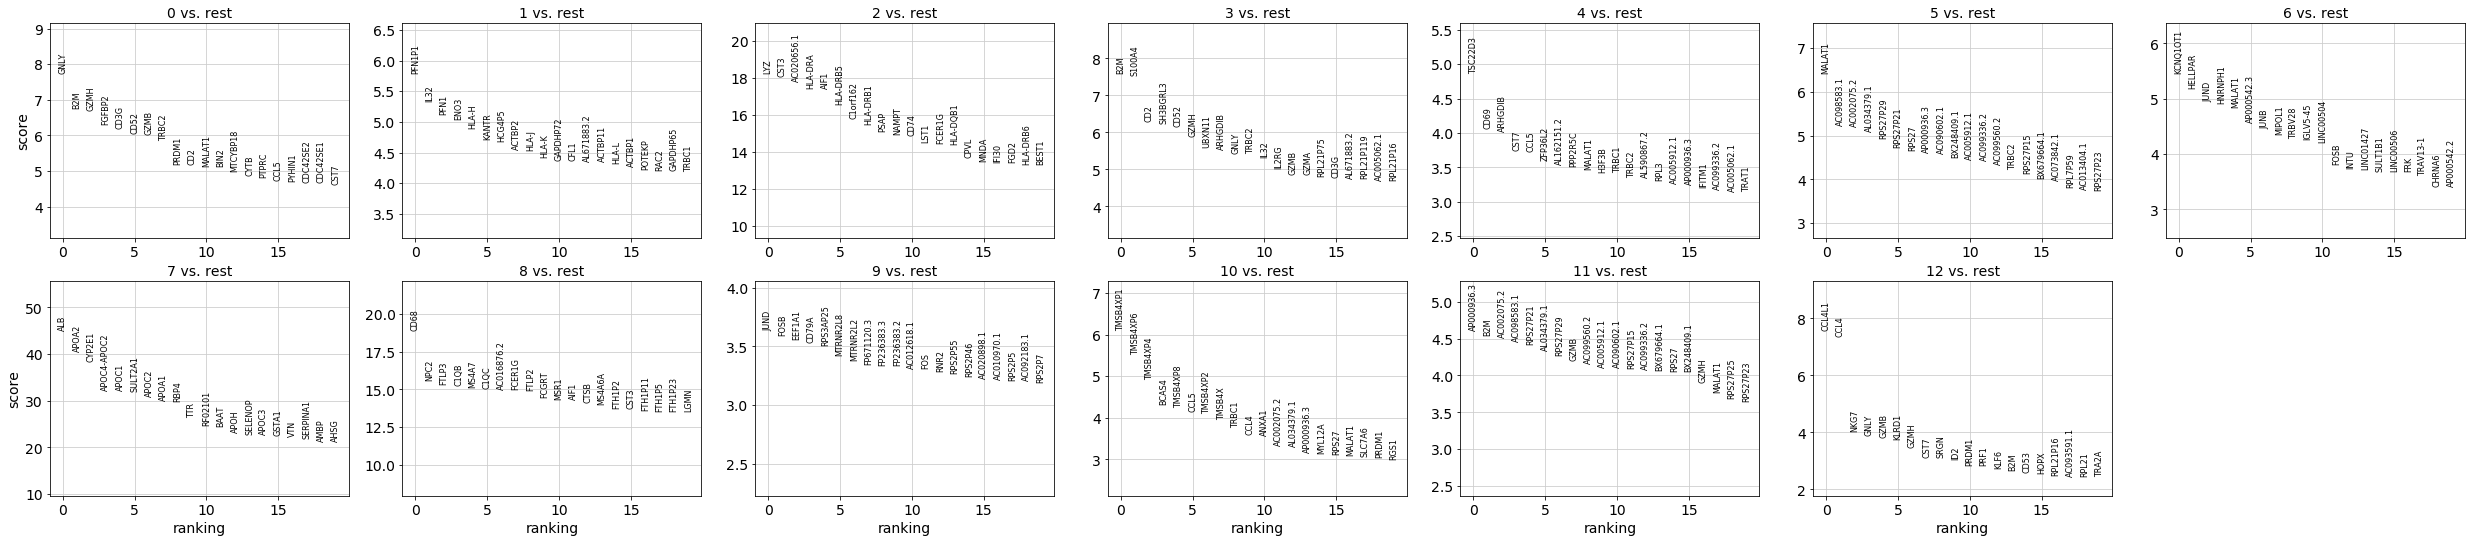

In [46]:
sc.tl.rank_genes_groups(P02, 'louvain')
sc.pl.rank_genes_groups(P02, n_genes=20,)

In [47]:
P02_louvain=pd.DataFrame(P02.uns['rank_genes_groups']['names']).head(15)
P02_louvain

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,GNLY,PFN1P1,LYZ,B2M,TSC22D3,MALAT1,KCNQ1OT1,ALB,CD68,JUND,TMSB4XP1,AP000936.3,CCL4L1
1,B2M,IL32,CST3,S100A4,CD69,AC098583.1,HELLPAR,APOA2,NPC2,FOSB,TMSB4XP6,B2M,CCL4
2,GZMH,PFN1,AC020656.1,CD2,ARHGDIB,AC002075.2,JUND,CYP2E1,FTLP3,EEF1A1,TMSB4XP4,AC002075.2,NKG7
3,FGFBP2,ENO3,HLA-DRA,SH3BGRL3,CST7,AL034379.1,HNRNPH1,APOC4-APOC2,C1QB,CD79A,BCAS4,AC098583.1,GNLY
4,CD3G,HLA-H,AIF1,CD52,CCL5,RPS27P29,MALAT1,APOC1,MS4A7,RPS3AP25,TMSB4XP8,RPS27P21,GZMB
5,CD52,KANTR,HLA-DRB5,GZMH,ZFP36L2,RPS27P21,AP000542.3,SULT2A1,C1QC,MTRNR2L8,CCL5,AL034379.1,KLRD1
6,GZMB,HCG4P5,C1orf162,UBXN11,AL162151.2,RPS27,JUNB,APOC2,AC016876.2,MTRNR2L2,TMSB4XP2,RPS27P29,GZMH
7,TRBC2,ACTBP2,HLA-DRB1,ARHGDIB,PPP2R5C,AP000936.3,MIPOL1,APOA1,FCER1G,FP671120.3,TMSB4X,GZMB,CST7
8,PRDM1,HLA-J,PSAP,GNLY,MALAT1,AC090602.1,TRBV28,RBP4,FTLP2,FP236383.3,TRBC1,AC099560.2,SRGN
9,CD2,HLA-K,NAMPT,TRBC2,H3F3B,BX248409.1,IGLV5-45,TTR,FCGRT,FP236383.2,CCL4,AC005912.1,ID2


In [48]:
P02.obs

,n_genes,percent_mito,n_counts,louvain
P02_A_0925,11755,0.0,8301043.0,6
P02_A_0926,11611,0.0,5695071.0,9
P02_A_0927,10659,0.0,5994274.0,5
P02_A_0928,10993,0.0,8595596.0,1
P02_A_0929,11897,0.0,5938872.0,6
P02_A_0930,11738,0.0,5630615.0,9
P02_A_0931,12031,0.0,7913389.0,6
P02_A_0932,11853,0.0,7876506.0,6
P02_A_0935,10472,0.0,4050691.0,6
P02_A_0936,13753,0.0,12984275.0,6


In [49]:
path = '/home/ehamilton/ProjectSummer2018/GRCh38/LiverCancer/BGI_LiverCancer/'
Annotation = pd.read_csv(path + 'P02_HCC_cellannotation.csv')

In [50]:
Annotation = Annotation.set_index('ID')

In [51]:
Accuracy = pd.concat([P02.obs, Annotation], axis=1, sort=True)
Accuracy

,n_genes,percent_mito,n_counts,louvain,Patient,Marker,Source,P02_Cluster,Cell_Type
P02_A_0925,11755.0,0.0,8301043.0,6,P02,CD45p,Adjacent,1,CD8_CX3CR1
P02_A_0926,11611.0,0.0,5695071.0,9,P02,CD45p,Adjacent,5,Liver_CD8_GZMK
P02_A_0927,10659.0,0.0,5994274.0,5,P02,CD45p,Adjacent,5,Liver_CD8_GZMK
P02_A_0928,10993.0,0.0,8595596.0,1,P02,CD45p,Adjacent,4,CD4_IL7R
P02_A_0929,11897.0,0.0,5938872.0,6,P02,CD45p,Adjacent,5,Liver_CD8_GZMK
P02_A_0930,11738.0,0.0,5630615.0,9,P02,CD45p,Adjacent,5,Liver_CD8_GZMK
P02_A_0931,12031.0,0.0,7913389.0,6,P02,CD45p,Adjacent,4,CD4_IL7R
P02_A_0932,11853.0,0.0,7876506.0,6,P02,CD45p,Adjacent,5,Liver_CD8_GZMK
P02_A_0935,10472.0,0.0,4050691.0,6,P02,CD45p,Adjacent,5,Liver_CD8_GZMK
P02_A_0936,13753.0,0.0,12984275.0,6,P02,CD45p,Adjacent,5,Liver_CD8_GZMK


In [52]:
Test = Accuracy.groupby(["louvain","P02_Cluster"]).size()

In [53]:
print(Test)

louvain  P02_Cluster
0        0              19
         1              49
         2              25
         4              12
         7               1
         8               2
         9               7
1        0              41
         1               6
         2              18
         3               2
         4              21
         5               2
         9               8
         10              7
         12              3
2        3              60
         6               9
         7              31
         8               2
         11              1
         12              4
3        0              25
         1              36
         2              15
         4              15
         8               2
         9               7
         10              3
4        0              29
                        ..
7        6               1
         11             56
         12              4
8        3              16
         6              29
       

In [54]:
outpath = '/home/ehamilton/ProjectSummer2018/GRCh38/LiverCancer/BGI_LiverCancer/'
outfile = outpath + 'LiverCancerComparison.csv'
Test.to_csv(outfile, sep='\t')